## Import all dependencies

In [198]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt

## Retrieve and transform the data

In [224]:
ufc_data_location = "../ufcdata/data.csv"

ufc_data = pd.read_csv(ufc_data_location)

In [144]:
#ufc_data

In [147]:
# Dropping all rows that have a draw
ufc_data = ufc_data[ufc_data.Winner != "Draw"].reset_index(drop=True)
#ufc_data

In [148]:
"""
In this version of the DNN I am just training using the numerical
columns
"""
numerical_cols = []
categorical_cols = []
for col, col_type in zip(ufc_data.dtypes.keys(), ufc_data.dtypes):
    if col_type == "float64" or col_type == "int64":
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)
        
print(categorical_cols)

['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'Winner', 'title_bout', 'weight_class', 'B_Stance', 'R_Stance']


In [149]:
# Create the features and labels column
labels = ufc_data["Winner"]
le = LabelEncoder()
le.fit(labels)

features = ufc_data[numerical_cols]
labels = le.transform(labels)

In [150]:
features = features.fillna(0)
#features

In [151]:
labels

array([1, 1, 1, ..., 1, 1, 1])

In [153]:
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)

In [155]:
# Retrieving train and test splits
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8)
X_train = X_train.values
X_test = X_test.values
print("X_train length {}, y_train length {}".format(X_train.shape, y_train.shape))
print("X_test length {}, y_test length {}".format(X_test.shape, y_test.shape))

X_train length (4048, 135), y_train length (4048,)
X_test length (1013, 135), y_test length (1013,)


## Create a model

In [218]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(135,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [219]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 128)               17408     
_________________________________________________________________
dense_43 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 129       
Total params: 50,561
Trainable params: 50,561
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [222]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Train on 4048 samples, validate on 1013 samples
Epoch 1/50
4048/4048 [==============================] - 0s 68us/step - loss: 0.5586 - accuracy: 0.7132 - val_loss: 0.8595 - val_accuracy: 0.6683
Epoch 2/50
4048/4048 [==============================] - 0s 63us/step - loss: 0.5379 - accuracy: 0.7221 - val_loss: 0.6533 - val_accuracy: 0.6900
Epoch 3/50
4048/4048 [==============================] - 0s 74us/step - loss: 0.5721 - accuracy: 0.7122 - val_loss: 0.6035 - val_accuracy: 0.6821
Epoch 4/50
4048/4048 [==============================] - 0s 70us/step - loss: 0.5101 - accuracy: 0.7362 - val_loss: 0.6043 - val_accuracy: 0.6920
Epoch 5/50
4048/4048 [==============================] - 0s 89us/step - loss: 0.5030 - accuracy: 0.7367 - val_loss: 0.6623 - val_accuracy: 0.6910
Epoch 6/50
4048/4048 [==============================] - 0s 62us/step - loss: 0.4923 - accuracy: 0.7379 - val_loss: 0.6382 - val_accuracy: 0.6881
Epoch 7/50
4048/4048 [==============================] - 0s 84us/step - loss: 0.508

## Evaluate the model

/Users/jamesperalta/PythonEnvs/ENSF-519/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


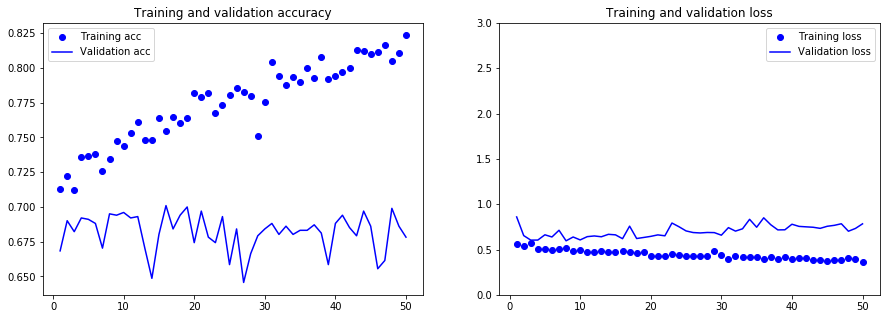

In [223]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (accuracy_axis, loss_axis) = plt.subplots(1, 2, figsize=(15, 5))

accuracy_axis.plot(epochs, acc, 'bo', label='Training acc')
accuracy_axis.plot(epochs, val_acc, 'b', label='Validation acc')
accuracy_axis.set_title('Training and validation accuracy')
accuracy_axis.legend()

loss_axis.plot(epochs, loss, 'bo', label='Training loss')
loss_axis.plot(epochs, val_loss, 'b', label='Validation loss')
loss_axis.set_title('Training and validation loss')
loss_axis.set_ylim(0, 3)
loss_axis.legend()
fig.show()

## Summary:

- Seem like the DNN's is not strong enough to model the data, the highest we can get to is 65-70% acc.
- We will need to try more sophisticated models

In [264]:
# Test on Jon Jones

jon_jones_red_df = ufc_data[ufc_data.R_fighter == "Jon Jones"]
jon_jones_blue_df = ufc_data[ufc_data.B_fighter == "Jon Jones"]
jon_jones_fights = pd.concat([jon_jones_red_df, jon_jones_blue_df]).reset_index(drop=True)
jon_jones_fights

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Jon Jones,Anthony Smith,Herb Dean,2019-03-02,"Las Vegas, Nevada, USA",Red,True,Light Heavyweight,5,0.0,...,5.0,5.0,0.0,17.0,Orthodox,193.04,213.36,205.0,30.0,31.0
1,Jon Jones,Alexander Gustafsson,Mike Beltran,2018-12-29,"Los Angeles, California, USA",Red,True,Light Heavyweight,5,0.0,...,4.0,5.0,0.0,16.0,Orthodox,193.04,213.36,205.0,31.0,31.0
2,Jon Jones,Ovince Saint Preux,Herb Dean,2016-04-23,"Las Vegas, Nevada, USA",Red,True,Light Heavyweight,5,0.0,...,4.0,5.0,0.0,15.0,Orthodox,193.04,213.36,205.0,33.0,28.0
3,Jon Jones,Daniel Cormier,Herb Dean,2015-01-03,"Las Vegas, Nevada, USA",Red,True,Light Heavyweight,5,0.0,...,4.0,5.0,0.0,14.0,Orthodox,193.04,213.36,205.0,35.0,27.0
4,Jon Jones,Glover Teixeira,Dan Miragliotta,2014-04-26,"Baltimore, Maryland, USA",Red,True,Light Heavyweight,5,0.0,...,4.0,5.0,0.0,13.0,Orthodox,193.04,213.36,205.0,34.0,26.0
5,Jon Jones,Alexander Gustafsson,John McCarthy,2013-09-21,"Toronto, Ontario, Canada",Red,True,Light Heavyweight,5,0.0,...,4.0,5.0,0.0,12.0,Orthodox,193.04,213.36,205.0,26.0,26.0
6,Jon Jones,Chael Sonnen,Keith Peterson,2013-04-27,"Newark, New Jersey, USA",Red,True,Light Heavyweight,5,1.0,...,3.0,5.0,0.0,11.0,Orthodox,193.04,213.36,205.0,36.0,25.0
7,Jon Jones,Vitor Belfort,John McCarthy,2012-09-22,"Toronto, Ontario, Canada",Red,True,Light Heavyweight,5,0.0,...,3.0,4.0,0.0,10.0,Orthodox,193.04,213.36,205.0,35.0,25.0
8,Jon Jones,Rashad Evans,Herb Dean,2012-04-21,"Atlanta, Georgia, USA",Red,True,Light Heavyweight,5,0.0,...,3.0,4.0,0.0,9.0,Orthodox,193.04,213.36,205.0,32.0,24.0
9,Jon Jones,Lyoto Machida,John McCarthy,2011-12-10,"Toronto, Ontario, Canada",Red,True,Light Heavyweight,5,0.0,...,3.0,3.0,0.0,8.0,Orthodox,193.04,213.36,205.0,33.0,24.0


In [265]:
jon_jones_fights = jon_jones_fights[jon_jones_fights.Winner != "Draw"]
# Red fighter
red_fighter = jon_jones_fights["R_fighter"]
# Blue fighter
blue_fighter = jon_jones_fights["B_fighter"]

In [275]:
labels = jon_jones_fights["Winner"]
le = LabelEncoder()
le.fit(labels)

features = jon_jones_fights[numerical_cols].values
labels = le.transform(labels)
print(features.shape)
print(labels.shape)
print(labels)
print(zip(red_fighter, blue_fighter))

(19, 135)
(19,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1]


In [282]:
predictions = np.transpose(model.predict_classes(features))[0]

for i, pred in enumerate(zip(red_fighter, blue_fighter)):
    winner = predictions[i]
    red, blue = pred
    if winner == 1:
        winner = red
    else:
        winner = blue
    print("{} vs. {} ... Winner: {}".format(red, blue, winner))
    
print("Model Accuracy on Jon Jones: {}".format(model.evaluate(features, labels, verbose=0)[1]))

Jon Jones vs. Anthony Smith ... Winner: Jon Jones
Jon Jones vs. Alexander Gustafsson ... Winner: Jon Jones
Jon Jones vs. Ovince Saint Preux ... Winner: Jon Jones
Jon Jones vs. Daniel Cormier ... Winner: Jon Jones
Jon Jones vs. Glover Teixeira ... Winner: Jon Jones
Jon Jones vs. Alexander Gustafsson ... Winner: Jon Jones
Jon Jones vs. Chael Sonnen ... Winner: Jon Jones
Jon Jones vs. Vitor Belfort ... Winner: Jon Jones
Jon Jones vs. Rashad Evans ... Winner: Jon Jones
Jon Jones vs. Lyoto Machida ... Winner: Jon Jones
Jon Jones vs. Rampage Jackson ... Winner: Jon Jones
Jon Jones vs. Ryan Bader ... Winner: Ryan Bader
Jon Jones vs. Vladimir Matyushenko ... Winner: Jon Jones
Jon Jones vs. Jake O'Brien ... Winner: Jon Jones
Jon Jones vs. Stephan Bonnar ... Winner: Jon Jones
Jon Jones vs. Andre Gusmao ... Winner: Andre Gusmao
Mauricio Rua vs. Jon Jones ... Winner: Jon Jones
Brandon Vera vs. Jon Jones ... Winner: Jon Jones
Matt Hamill vs. Jon Jones ... Winner: Jon Jones
Model Accuracy on Jon Jon